In [106]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
from plots_utils import make_scatter_line_plots, make_BOI_netGW_vs_pumping_vs_USGS_scatter_plot, \
                        make_line_plot_v1, make_line_plot_v2, make_scatter_plot

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# model version = V10

# Annual pumping vs net GW (in m3) comparison for all basins

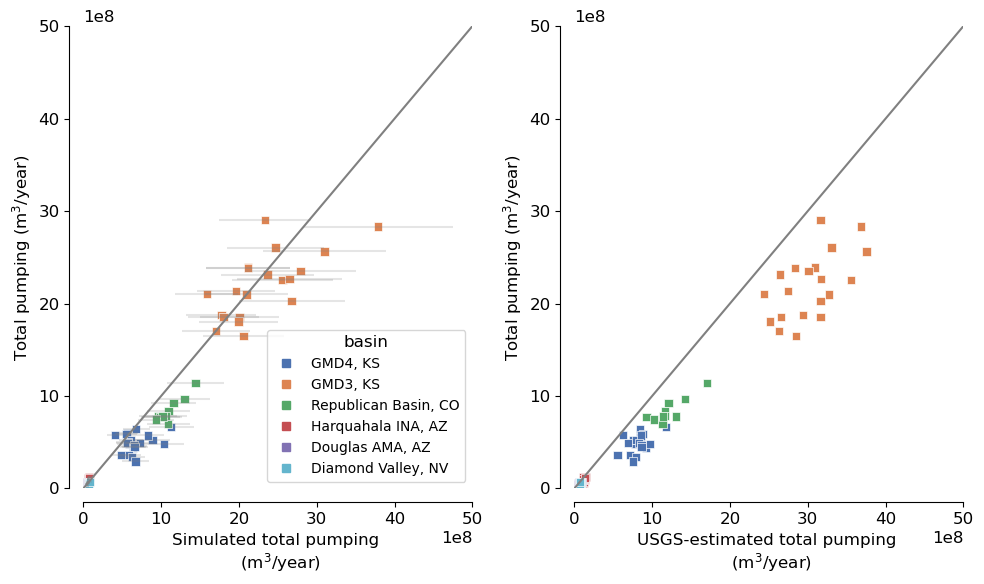

In [32]:
ann_df = pd.read_csv('../../Data_main/results_eval/netGW/annual_all_basins.csv')

# filtering steps for RPB, CO data; flow meters installed after 2010
ann_df = ann_df[~((ann_df['basin'] == 'Republican Basin, CO') & (ann_df['year'] < 2010))]

plot_save_path = './plots/all_basins_total_m3_comparison_v2.png'

basin_names = ('GMD4, KS', 'GMD3, KS', 'Republican Basin, CO', 'Harquahala INA, AZ', 'Douglas AMA, AZ', 'Diamond Valley, NV')

make_BOI_netGW_vs_pumping_vs_USGS_scatter_plot(df=ann_df, x1='sim_pumping_m3', y1='pumping_m3', 
                                               error_col='error_range_m3', hue='basin', 
                                               xlabel1='Simulated total pumping \n (m$^3$/year)', 
                                               ylabel1='Total pumping (m$^3$/year)', 
                                               fontsize=12, lim=(0, 5000000000),
                                               scientific_ticks=True, scilimits=(8, 8),
                                               basin_labels=basin_names,
                                               x2='USGS_m3', 
                                               y2='pumping_m3', 
                                               xlabel2='USGS-estimated total pumping \n (m$^3$/year)', 
                                               ylabel2='Total pumping (m$^3$/year)',
                                               legend='on',
                                               figsize=(10, 6), savepath=plot_save_path)

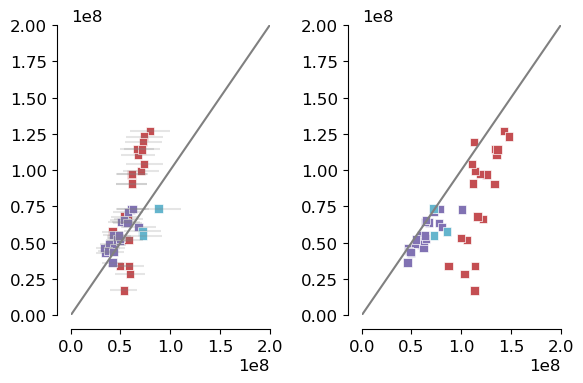

In [33]:
basin_names = ('Harquahala INA, AZ', 'Douglas AMA, AZ', 'Diamond Valley, NV')
ann_df_sel = ann_df[ann_df['basin'].isin(basin_names)] 

plot_save_path = './plots/small_basins_total_m3_comparison_v2.png'

make_BOI_netGW_vs_pumping_vs_USGS_scatter_plot(df=ann_df_sel, x1='sim_pumping_m3', y1='pumping_m3', 
                                               error_col='error_range_m3', hue='basin', 
                                               xlabel1=None, 
                                               ylabel1=None, 
                                               fontsize=12, lim=(0, 200000000),
                                               scientific_ticks=True, scilimits=(8, 8),
                                               basin_labels=basin_names,
                                               x2='USGS_m3', 
                                               y2='pumping_m3', 
                                               xlabel2=None, 
                                               ylabel2=None,
                                               figsize=(6, 4), 
                                               legend='off',
                                               savepath=plot_save_path)

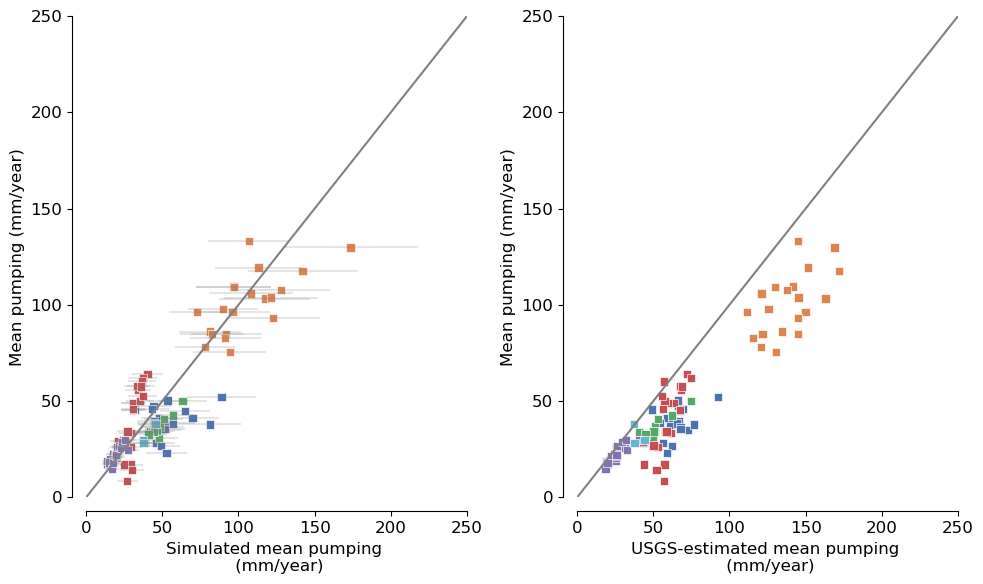

In [34]:
ann_df = pd.read_csv('../../Data_main/results_eval/netGW/annual_all_basins.csv')

# filtering steps for RPB, CO data; flow meters installed after 2010
ann_df = ann_df[~((ann_df['basin'] == 'Republican Basin, CO') & (ann_df['year'] < 2010))]

plot_save_path = './plots/all_basins_mean_mm_comparison_v2.png'

basin_names = ('GMD4, KS', 'GMD3, KS', 'Republican Basin, CO', 'Harquahala INA, AZ', 'Douglas AMA, AZ', 'Diamond Valley, NV')

make_BOI_netGW_vs_pumping_vs_USGS_scatter_plot(df=ann_df, x1='sim_mean_pumping_mm', y1='mean pumping_mm', 
                                               error_col='error_range_mm', hue='basin', 
                                               xlabel1='Simulated mean pumping \n (mm/year)', 
                                               ylabel1='Mean pumping (mm/year)', 
                                               fontsize=12, lim=(0, 250),
                                               scientific_ticks=False, scilimits=(8, 8),
                                               basin_labels=basin_names,
                                               x2='mean USGS_mm', 
                                               y2='mean pumping_mm', 
                                               xlabel2='USGS-estimated mean pumping \n (mm/year)', 
                                               ylabel2='Mean pumping (mm/year)',
                                               legend='off',
                                               figsize=(10, 6), savepath=plot_save_path)

------------

# GMD4, Kansas

In [111]:
ann_df = pd.read_csv('../../Data_main/results_eval/netGW/annual_all_basins.csv')
ann_df_sel = ann_df[ann_df['basin'] == 'GMD4, KS']
ann_df_sel.loc[ann_df_sel['mean pumping_mm'] < 1, 'mean pumping_mm'] = np.nan

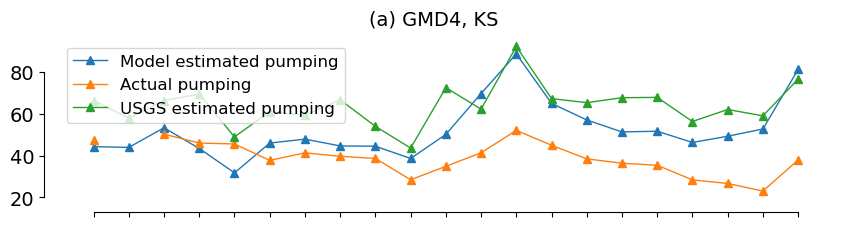

In [112]:
year = [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
        2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]

savepath = 'Plots/GMD4_timeseries.png'

make_line_plot_v2(y1=ann_df_sel['sim_mean_pumping_mm'], y2=ann_df_sel['mean pumping_mm'], y3=ann_df_sel['mean USGS_mm'], year=year, fontsize=14, 
                  xlabel=None, ylabel=None, 
                  line_label_1='Model estimated pumping', line_label_2='Actual pumping', line_label_3='USGS estimated pumping', 
                  suptitle='(a) GMD4, KS',
                  figsize=(10, 3), legend_pos='upper left', legend='on', savepath= savepath, no_xticks=True)

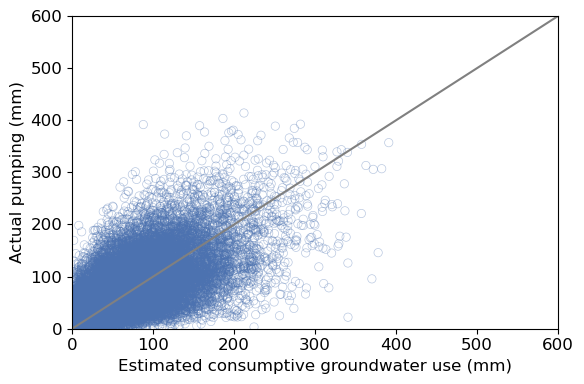

In [9]:
pts_df = pd.read_csv('../../Data_main/results_eval/netGW/gmd4/gmd4_netGW_pumping.csv')

# removing values with netGW and pumping = 0
pts_df = pts_df[(pts_df['netGW_mm'] > 0) & (pts_df['pumping_mm'] > 0)]

# # outlier filter (Ott et al. 2024)
# pts_df = pts_df[(pts_df['pumping_mm'] / pts_df['netGW_mm'] >= 0.5)]

# plotting
make_scatter_plot(df=pts_df, x='netGW_mm', y='pumping_mm', 
                  xlabel='Estimated consumptive groundwater use (mm)', 
                  ylabel='Actual pumping (mm)', fontsize=12, lim=(0, 600),
                  alpha=0.4, edgecolor='#4c72b0', facecolor='None',
                  figsize=(6, 4),
                  scientific_ticks=False, savepath=None)

-------------------

# GMD3, Kansas

In [109]:
ann_df = pd.read_csv('../../Data_main/results_eval/netGW/annual_all_basins.csv')
ann_df_sel = ann_df[ann_df['basin'] == 'GMD3, KS']
ann_df_sel.loc[ann_df_sel['mean pumping_mm'] < 1, 'mean pumping_mm'] = np.nan

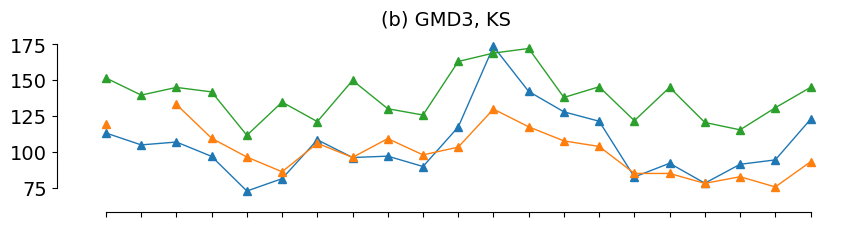

In [110]:
year = [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
        2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]

savepath = 'Plots/GMD3_timeseries.png'

make_line_plot_v2(y1=ann_df_sel['sim_mean_pumping_mm'], y2=ann_df_sel['mean pumping_mm'], y3=ann_df_sel['mean USGS_mm'], year=year, fontsize=14, 
                  xlabel=None, ylabel=None, 
                  line_label_1='Model estimated pumping', line_label_2='Actual pumping', line_label_3='USGS estimated pumping', 
                  suptitle='(b) GMD3, KS',
                  figsize=(10, 3), legend_pos='upper left', legend='off', savepath= savepath, no_xticks=True)

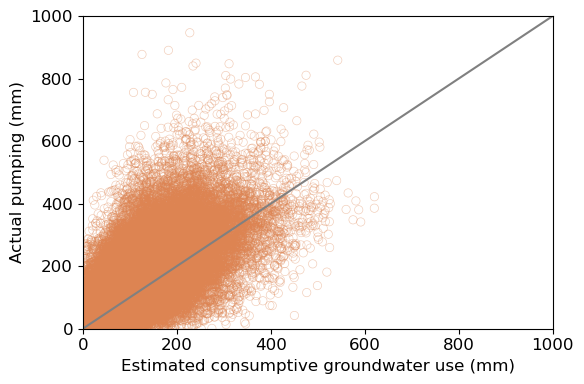

In [12]:
pts_df = pd.read_csv('../../Data_main/results_eval/netGW/gmd3/gmd3_netGW_pumping.csv')

# removing values with netGW and pumping = 0
pts_df = pts_df[(pts_df['netGW_mm'] > 0) & (pts_df['pumping_mm'] > 0)]

# # outlier filter (Ott et al. 2024)
# pts_df = pts_df[(pts_df['pumping_mm'] / pts_df['netGW_mm'] >= 0.5)]

# plotting
make_scatter_plot(df=pts_df, x='netGW_mm', y='pumping_mm', 
                  xlabel='Estimated consumptive groundwater use (mm)', 
                  ylabel='Actual pumping (mm)', fontsize=12, lim=(0, 1000),
                  alpha=0.4, edgecolor='#dd8452', facecolor='None',
                  figsize=(6, 4),
                  scientific_ticks=False, savepath=None)

---------

# RPB, Colorado

In [113]:
ann_df = pd.read_csv('../../Data_main/results_eval/netGW/annual_all_basins.csv')
ann_df_sel = ann_df[ann_df['basin'] == 'Republican Basin, CO']
ann_df_sel.loc[ann_df_sel['mean pumping_mm'] < 1, 'mean pumping_mm'] = np.nan

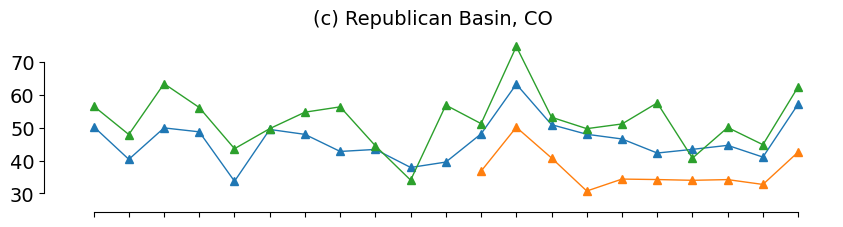

In [114]:
year = [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
        2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]

savepath = 'Plots/RPB_timeseries.png'

make_line_plot_v2(y1=ann_df_sel['sim_mean_pumping_mm'], y2=ann_df_sel['mean pumping_mm'], y3=ann_df_sel['mean USGS_mm'], year=year, fontsize=14, 
                  xlabel=None, ylabel=None, 
                  line_label_1='Model estimated pumping', line_label_2='Actual pumping', line_label_3='USGS estimated pumping', 
                  suptitle='(c) Republican Basin, CO',
                  figsize=(10, 3), legend_pos='upper left', legend='off', savepath= savepath, no_xticks=True)

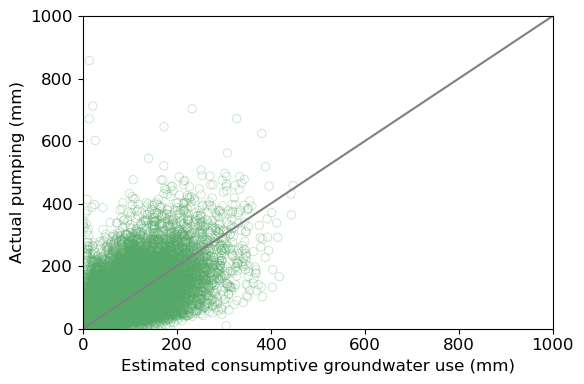

In [15]:
pts_df = pd.read_csv('../../Data_main/results_eval/netGW/rpb/rpb_netGW_pumping.csv')

# removing values with netGW and pumping = 0
pts_df = pts_df[(pts_df['netGW_mm'] > 0) & (pts_df['pumping_mm'] > 0)]

# # outlier filter (Ott et al. 2024)
# pts_df = pts_df[(pts_df['pumping_mm'] / pts_df['netGW_mm'] >= 0.5)]

# plotting
make_scatter_plot(df=pts_df, x='netGW_mm', y='pumping_mm', 
                  xlabel='Estimated consumptive groundwater use (mm)', 
                  ylabel='Actual pumping (mm)', fontsize=12, lim=(0, 1000),
                  alpha=0.4, edgecolor='#55a868', facecolor='None',
                  figsize=(6, 4),
                  scientific_ticks=False, savepath=None)

________________

# Harquahala INA, Arizona

In [115]:
ann_df = pd.read_csv('../../Data_main/results_eval/netGW/annual_all_basins.csv')
ann_df_sel = ann_df[ann_df['basin'] == 'Harquahala INA, AZ']
ann_df_sel.loc[ann_df_sel['mean pumping_mm'] < 1, 'mean pumping_mm'] = np.nan

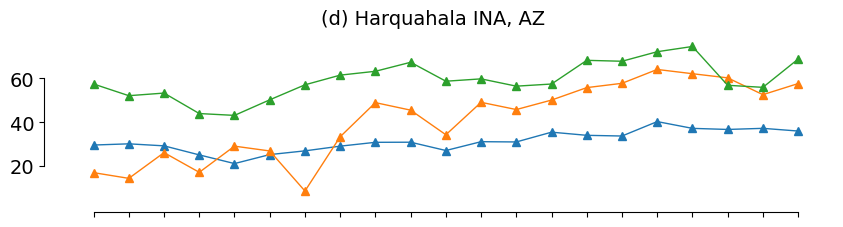

In [116]:
year = [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
        2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]

savepath = 'Plots/HQR_timeseries.png'

make_line_plot_v2(y1=ann_df_sel['sim_mean_pumping_mm'], y2=ann_df_sel['mean pumping_mm'], y3=ann_df_sel['mean USGS_mm'], year=year, fontsize=14, 
                  xlabel=None, ylabel=None, 
                  line_label_1='Model estimated pumping', line_label_2='Actual pumping', line_label_3='USGS estimated pumping', 
                  suptitle='(d) Harquahala INA, AZ',
                  figsize=(10, 3), legend_pos='upper left', legend='off', savepath= savepath, no_xticks=True)

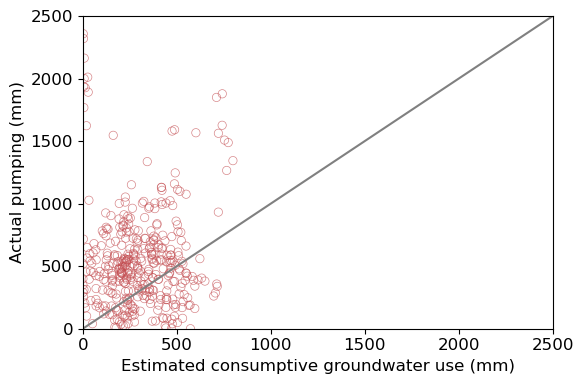

In [18]:
pts_df = pd.read_csv('../../Data_main/results_eval/netGW/hqr/hqr_netGW_pumping.csv')

# removing values with netGW and pumping = 0
pts_df = pts_df[(pts_df['netGW_mm'] > 0) & (pts_df['pumping_mm'] > 0)]

# # outlier filter (Ott et al. 2024)
# pts_df = pts_df[(pts_df['pumping_mm'] / pts_df['netGW_mm'] >= 0.5)]

# plotting
make_scatter_plot(df=pts_df, x='netGW_mm', y='pumping_mm', 
                  xlabel='Estimated consumptive groundwater use (mm)', 
                  ylabel='Actual pumping (mm)', fontsize=12, lim=(0, 2500),
                  alpha=0.7, edgecolor='#c44e52', facecolor='None',
                  figsize=(6, 4),
                  scientific_ticks=False, savepath=None)

------------------

# Douglas AMA, Arizona

In [117]:
ann_df = pd.read_csv('../../Data_main/results_eval/netGW/annual_all_basins.csv')
ann_df_sel = ann_df[ann_df['basin'] == 'Douglas AMA, AZ']
ann_df_sel.loc[ann_df_sel['mean pumping_mm'] < 1, 'mean pumping_mm'] = np.nan

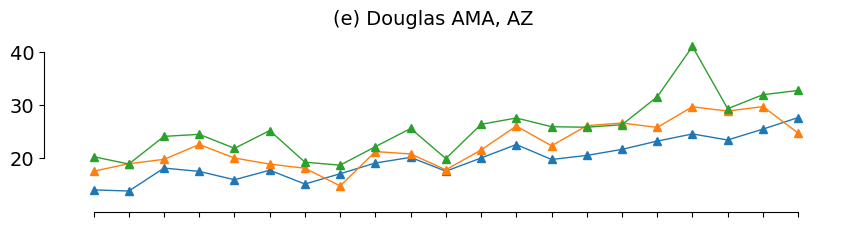

In [118]:
year = [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
        2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]

savepath = 'Plots/Doug_timeseries.png'

make_line_plot_v2(y1=ann_df_sel['sim_mean_pumping_mm'], y2=ann_df_sel['mean pumping_mm'], y3=ann_df_sel['mean USGS_mm'], year=year, fontsize=14, 
                  xlabel=None, ylabel=None, 
                  line_label_1='Model estimated pumping', line_label_2='Actual pumping', line_label_3='USGS estimated pumping', 
                  suptitle='(e) Douglas AMA, AZ',
                  figsize=(10, 3), legend_pos='upper left', legend='off', savepath= savepath, no_xticks=True)

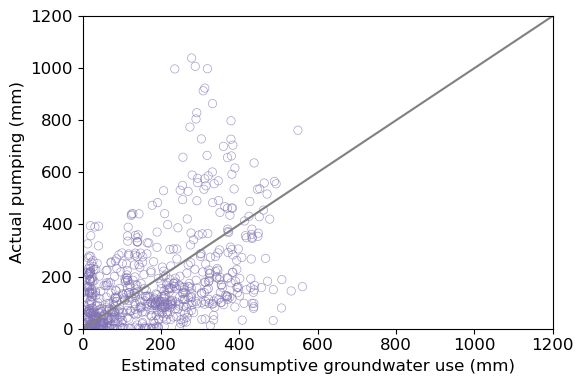

In [21]:
pts_df = pd.read_csv('../../Data_main/results_eval/netGW/doug/doug_netGW_pumping.csv')

# removing values with netGW and pumping = 0
pts_df = pts_df[(pts_df['netGW_mm'] > 0) & (pts_df['pumping_mm'] > 0)]

# # outlier filter (Ott et al. 2024)
# pts_df = pts_df[(pts_df['pumping_mm'] / pts_df['netGW_mm'] >= 0.5)]

# plotting
make_scatter_plot(df=pts_df, x='netGW_mm', y='pumping_mm', 
                  xlabel='Estimated consumptive groundwater use (mm)', 
                  ylabel='Actual pumping (mm)', fontsize=12, lim=(0, 1200),
                  alpha=0.7, edgecolor='#8172b3', facecolor='None',
                  figsize=(6, 4),
                  scientific_ticks=False, savepath=None)

----------

# Diamod Valley, Nevada

In [120]:
ann_df = pd.read_csv('../../Data_main/results_eval/netGW/annual_all_basins.csv')
ann_df_sel = ann_df[ann_df['basin'] == 'Diamond Valley, NV']
ann_df_sel.loc[ann_df_sel['mean pumping_mm'] < 1, 'mean pumping_mm'] = np.nan

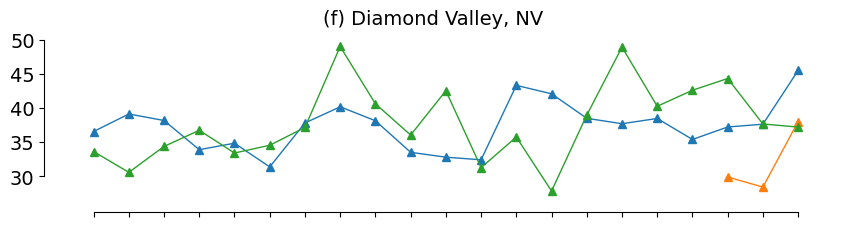

In [121]:
year = [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
        2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]

savepath = 'Plots/DV_timeseries.png'

make_line_plot_v2(y1=ann_df_sel['sim_mean_pumping_mm'], y2=ann_df_sel['mean pumping_mm'], y3=ann_df_sel['mean USGS_mm'], year=year, fontsize=14, 
                  xlabel=None, ylabel=None, 
                  line_label_1='Model estimated pumping', line_label_2='Actual pumping', line_label_3='USGS estimated pumping', 
                  suptitle='(f) Diamond Valley, NV',
                  figsize=(10, 3), legend_pos='upper left', legend='off', savepath= savepath, no_xticks=True)

--------------

## Central Valley, CV

In [124]:
ann_df = pd.read_csv('../../Data_main/results_eval/netGW/cv/cv_annual.csv')
ann_df.columns

Index(['year', 'netGW_mm', 'netGW_AF', 'USGS_AF', 'netGW_m3', 'USGS_m3',
       'mean netGW_mm', 'mean USGS_mm', 'sim_pumping_m3',
       'sim_mean_pumping_mm'],
      dtype='object')

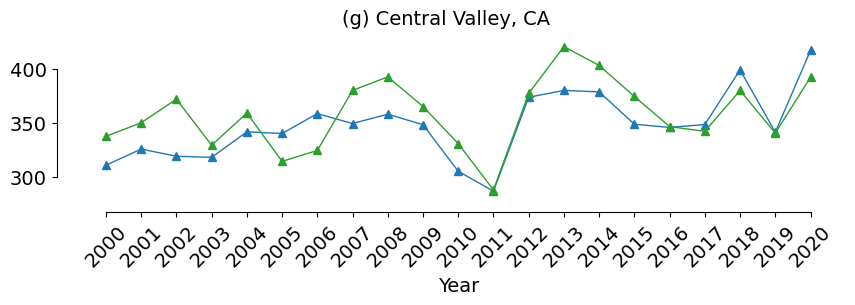

In [125]:
year = [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
        2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]

savepath = 'Plots/CV_timeseries.png'

make_line_plot_v1(y1=ann_df['sim_mean_pumping_mm'], y2=ann_df['mean USGS_mm'], year=year, fontsize=14, 
                  xlabel='Year', ylabel=None, 
                  line_label_1='Model estimated pumping', line_label_2='Actual pumping',
                  suptitle='(g) Central Valley, CA',
                  figsize=(10, 3), legend_pos='upper left', legend='off', savepath= savepath, no_xticks=False)

------------

## Snake River Basin, ID

In [26]:
ann_df = pd.read_csv('../../Data_main/results_eval/netGW/srb/srb_annual.csv')

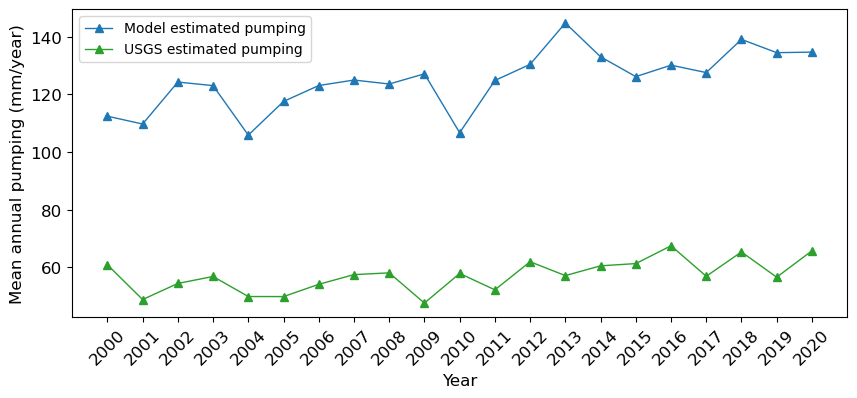

In [27]:
year = [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
        2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]

make_line_plot_v1(y1=ann_df['sim_mean_pumping_mm'], y2=ann_df['mean USGS_mm'], year=year, fontsize=12, 
                  xlabel='Year', ylabel='Mean annual pumping (mm/year)', 
                  line_label_1='Model estimated pumping', line_label_2='USGS estimated pumping', 
                  figsize=(10, 4), legend_pos='upper left')